<a href="https://colab.research.google.com/github/g-roger/plataformas-cognitivas/blob/main/Plataformas_Azure_Face_Find.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!git clone https://github.com/elthonf/azure-ml.git

Cloning into 'azure-ml'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 105 (delta 41), reused 83 (delta 24), pack-reused 0
Receiving objects: 100% (105/105), 6.01 MiB | 10.97 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [2]:
!pip install azure-cognitiveservices-vision-face
!pip install Pillow

     |████████████████████████████████| 67 kB 2.2 MB/s 
     |████████████████████████████████| 85 kB 448 kB/s 
     |████████████████████████████████| 41 kB 621 kB/s 


In [3]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image, ImageDraw
import json


In [4]:
def getRectangle(faceDictionary):
    """
    Função para criar um retângulo a partir de uma face identificada pelo Azure Face Detection
    :param faceDictionary:
    :return:
    """
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height

    return ((left, top), (right, bottom))

# Cliente de API

In [5]:
KEY = "d277f07663c0466cba87377cae860d7a" #Coloque aqui sua chave
ENDPOINT = "https://facial-recognition-20ia.cognitiveservices.azure.com/" #Coloque aqui seu endpoint (Ponto de Extremidade)
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

Obtém arquivos

In [13]:
imagefile01 = "./azure-ml/datasets/facial/8.png" #Imagem com a face única
NomeDoDonoDoRosto = "Groger" #Nome da pessoa que está na face única
imagefile02 = "./azure-ml/datasets/facial/4.png" #Imagem com as faces a procurar

Identifica FaceIDs da imagem 01

In [14]:
with open(imagefile01, 'r+b') as w:
    detected_faces01 = face_client.face.detect_with_stream(image=w)

for face in detected_faces01:
    face_to_find = face.face_id
    print("**** [{0}] foi detectado com face id [{1}] em : {2}".format(NomeDoDonoDoRosto, face.face_id, face.face_rectangle))

**** [Groger] foi detectado com face id [cc02d82c-6f0b-4dc0-b680-b03b3a5b3176] em : {'additional_properties': {}, 'width': 454, 'height': 454, 'left': 74, 'top': 193}


Identifica FaceIDs da imagem 02

In [15]:
with open(imagefile02, 'r+b') as w:
    detected_faces02 = face_client.face.detect_with_stream(image=w)
faces_to_compare = []
for face in detected_faces02:
    faces_to_compare.append(face.face_id)
    print("**** Detected face id [{0}] on : {1}".format(face.face_id, face.face_rectangle))

#Chama API para identificar faces similares
similar_faces = face_client.face.find_similar(face_id=face_to_find, face_ids=faces_to_compare)

**** Detected face id [d569c9a9-d52a-44dc-b55d-c692870b1e90] on : {'additional_properties': {}, 'width': 167, 'height': 167, 'left': 565, 'top': 225}
**** Detected face id [aa1513a6-98ae-4c47-9d94-e3a8b204dcb4] on : {'additional_properties': {}, 'width': 155, 'height': 155, 'left': 108, 'top': 191}
**** Detected face id [f21962af-00f0-471d-aa81-766f0d115aa6] on : {'additional_properties': {}, 'width': 147, 'height': 147, 'left': 410, 'top': 242}
**** Detected face id [ca1ba402-c4cc-47f4-9ec7-bff374ffd00a] on : {'additional_properties': {}, 'width': 123, 'height': 123, 'left': 227, 'top': 428}


In [16]:
if not similar_faces[0]:
    print('Sem rostos similares na segunda imagem.')
else:
    for similar in similar_faces:
        print("Face [{0}] similar à face [{1}] com {2} de confiança.".format( face_to_find, similar.face_id, similar.confidence))
    img = Image.open(imagefile02)
    draw = ImageDraw.Draw(img)
    img = Image.open(imagefile02)
    draw = ImageDraw.Draw(img)
    for face in detected_faces02: #Loop de todas as faces na foto 2
        if face.face_id in list(map(lambda x: x.face_id, similar_faces)): #Se a face estiver entre as similares
            draw.rectangle(xy=getRectangle(face), outline='red')
            draw.text(xy=(face.face_rectangle.left, face.face_rectangle.top + face.face_rectangle.height),
                      text=NomeDoDonoDoRosto,
                      fill="red")


Face [cc02d82c-6f0b-4dc0-b680-b03b3a5b3176] similar à face [aa1513a6-98ae-4c47-9d94-e3a8b204dcb4] com 0.7345002 de confiança.


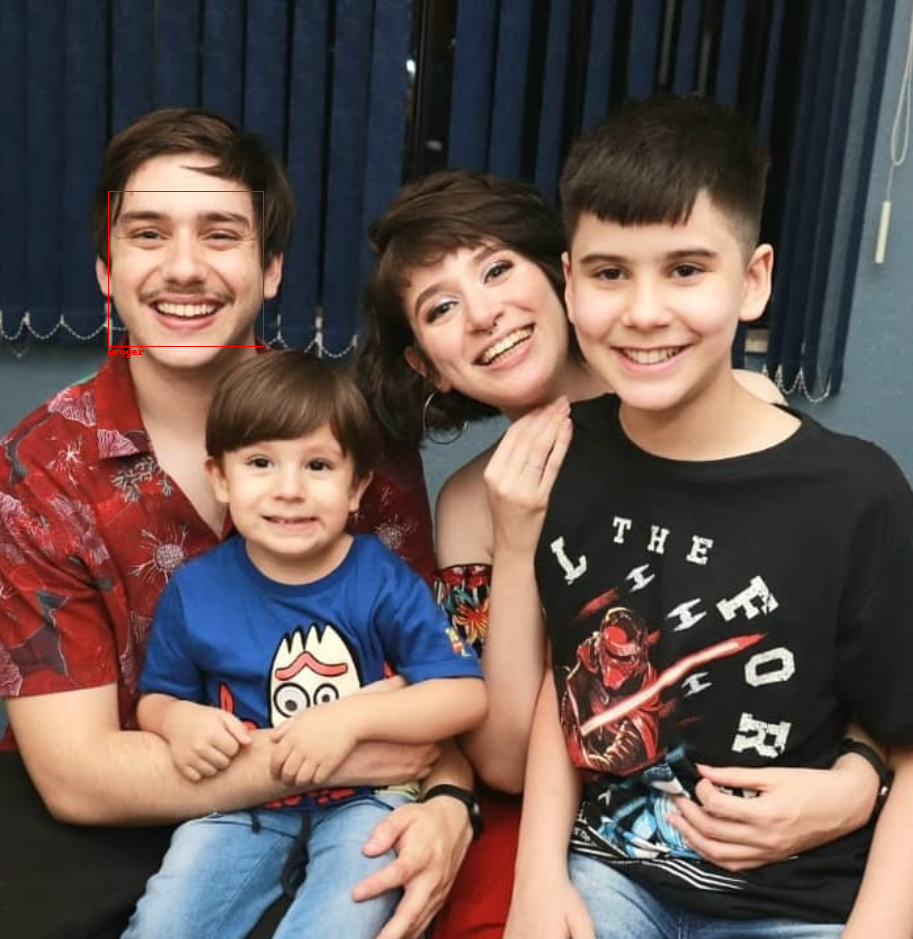

In [17]:
img